## Data pre-processing and augmentation

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from models.vgg16 import VGG16
from classifier import save_bottleneck_features, train_top_model
import glob
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [3]:
img = load_img('data/train/vehicles/4.png') # this is a PIL image
x = img_to_array(img) # this is a Numpy array with shape (3, 64, 64)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 64, 64)

In [4]:
# the .flow() command generates batches of randomly transformed images
# and saves the results to the 'preview/' directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='data/preview', save_prefix='car', save_format='png'):
    i += 1
    if i > 20:
        break # otherwise the generator would loop indefinitely

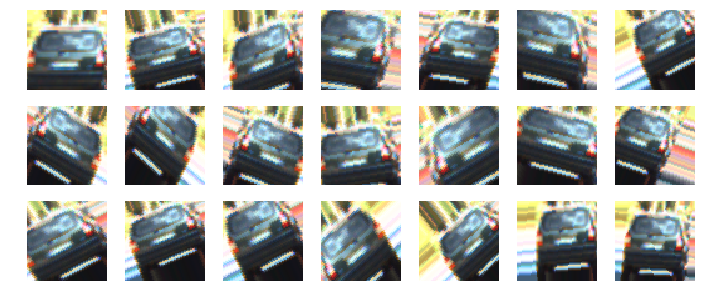

In [5]:
fnames = glob.glob('data/preview/*')
plt.figure(figsize=(12,12))

for i, fname in enumerate(fnames,start=1):
    img = load_img(fname)
    plt.subplot(7,7,i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

## Fine-tune VGG16

In [6]:
save_bottleneck_features()

Found 14208 images belonging to 2 classes.
Found 1776 images belonging to 2 classes.


In [7]:
train_top_model()

Train on 14208 samples, validate on 1776 samples
Epoch 1/20
14208/14208 [==============================] - 2s - loss: 0.0782 - acc: 0.9721 - val_loss: 0.0418 - val_acc: 0.9865
Epoch 2/20
14208/14208 [==============================] - 2s - loss: 0.0454 - acc: 0.9885 - val_loss: 0.0314 - val_acc: 0.9916
Epoch 3/20
14208/14208 [==============================] - 2s - loss: 0.0380 - acc: 0.9899 - val_loss: 0.0286 - val_acc: 0.9921
Epoch 4/20
14208/14208 [==============================] - 2s - loss: 0.0380 - acc: 0.9898 - val_loss: 0.0332 - val_acc: 0.9927
Epoch 5/20
14208/14208 [==============================] - 2s - loss: 0.0315 - acc: 0.9919 - val_loss: 0.0478 - val_acc: 0.9921
Epoch 6/20
14208/14208 [==============================] - 2s - loss: 0.0272 - acc: 0.9932 - val_loss: 0.0315 - val_acc: 0.9927
Epoch 7/20
14208/14208 [==============================] - 2s - loss: 0.0232 - acc: 0.9939 - val_loss: 0.0291 - val_acc: 0.9955
Epoch 8/20
14208/14208 [==============================] - 2s -